# DSCI 100 Group Project: Predicting Subscription Class From Usage of a Video Game Research Server

# Introduction
A computer science-focused research group at UBC has been collecting data concerning different statistics about how people play video games. A MineCraft server was set up in order to track data as volunteer players navigated through the MineCraft world. Variables such as played hours, age, gender, and experience level were tracked. 

In this project, we are investigating **what player characteristics and behaviours are most predictive of subscribing to a game-related newsletter, and how these features differ between various player types.** More specifically, we are investigating if a **player’s age, experience level, and total played hours can predict whether a player will subscribe to the newsletter.** 

This data and predictive analysis can help the research group identify patterns in player behaviours and tailor a game-related newsletter to a more refined group of players in order to increase subscription rates. 

The dataset (players.csv) used here provides player information which can help examine what factors are most predictive of subscribing to the newsletter, and if any of these variables overlap. Demographic and behavioural engagement variables provided in the dataset can be used to predict the class of the target variable, subscribe. 

In [1]:
library(tidyverse)
library(repr)
library(tidymodels)
players <- read_csv("https://raw.githubusercontent.com/huangcaitlyn/DSCIProject_Group_32/refs/heads/main/players.csv")

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

In [2]:
summary(players)

  experience        subscribe       hashedEmail         played_hours    
 Length:196         Mode :logical   Length:196         Min.   :  0.000  
 Class :character   FALSE:52        Class :character   1st Qu.:  0.000  
 Mode  :character   TRUE :144       Mode  :character   Median :  0.100  
                                                       Mean   :  5.846  
                                                       3rd Qu.:  0.600  
                                                       Max.   :223.100  
                                                                        
     name              gender               Age       
 Length:196         Length:196         Min.   : 9.00  
 Class :character   Class :character   1st Qu.:17.00  
 Mode  :character   Mode  :character   Median :19.00  
                                       Mean   :21.14  
                                       3rd Qu.:22.75  
                                       Max.   :58.00  
                               

## Data Description

### players.csv summary 

This dataset contains player information, including demographics and playing experience. 
- Number of observations: 196 
- Number of variables: 7

Issues: 
- Some categories are unevenly distributed (ex. Experience, played_hours, subscribe) – must be standardized 
- Some variables not useful for prediction (ex. name) 
- Missing values (ex. 2 N/As in Age) 

| Variable | Type | Description |
|-----------|------|-------------|
| experience | chr (character) | player's self-reported experience level (ex. amateur, pro, veteran, regular, beginner) | 
| subscribe | lgl (logical) | whether the player subscirbes to the game-related newsletter (TRUE, FALSE) | 
| hashedEmail | chr (character) | unique identifier (hashed for anonymity) |
| played__hours | dbl (double) | total hours spent playing | 
| name | chr (character) | anonymized player name | 
| gender | chr (character) | player's gender | 
| Age | dbl (double) | player's age (years) |

Summary Statistics: 
| Variable | Min | 1st quarter | Media | Mean | 3rd quarter | Max | N/As| 
|----------|-----|-------------|-------|------|-------------|-----|-----|
| played_hours | 0.000 | 0.000 | 0.100 | 5.846 | 0.600 | 223.100 | 0 |
| Age | 9.00 | 17.00 | 19.00 | 21.14 | 22.75 | 58.00 | 2 |

## Data Wrangling

In [3]:
head(players)

experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


In [4]:
# Select predictor variables in dataframe
players_select <- select(players, Age, experience, played_hours, subscribe)

# Omit N/A values in dataframe
players_clean <- na.omit(players_select)
players_clean

Age,experience,played_hours,subscribe
<dbl>,<chr>,<dbl>,<lgl>
9,Pro,30.3,TRUE
17,Veteran,3.8,TRUE
17,Veteran,0.0,FALSE
21,Amateur,0.7,TRUE
21,Regular,0.1,TRUE
17,Amateur,0.0,TRUE
19,Regular,0.0,TRUE
21,Amateur,0.0,FALSE
47,Amateur,0.1,TRUE


### Mean Value for each quantitative variable in players dataset

In [5]:
mean_data <- players_clean |>
summarize(mean_age = mean(Age), mean_played_hours = mean(played_hours))

mean_data

mean_age,mean_played_hours
<dbl>,<dbl>
21.13918,5.904639


### Subscription vs Experience

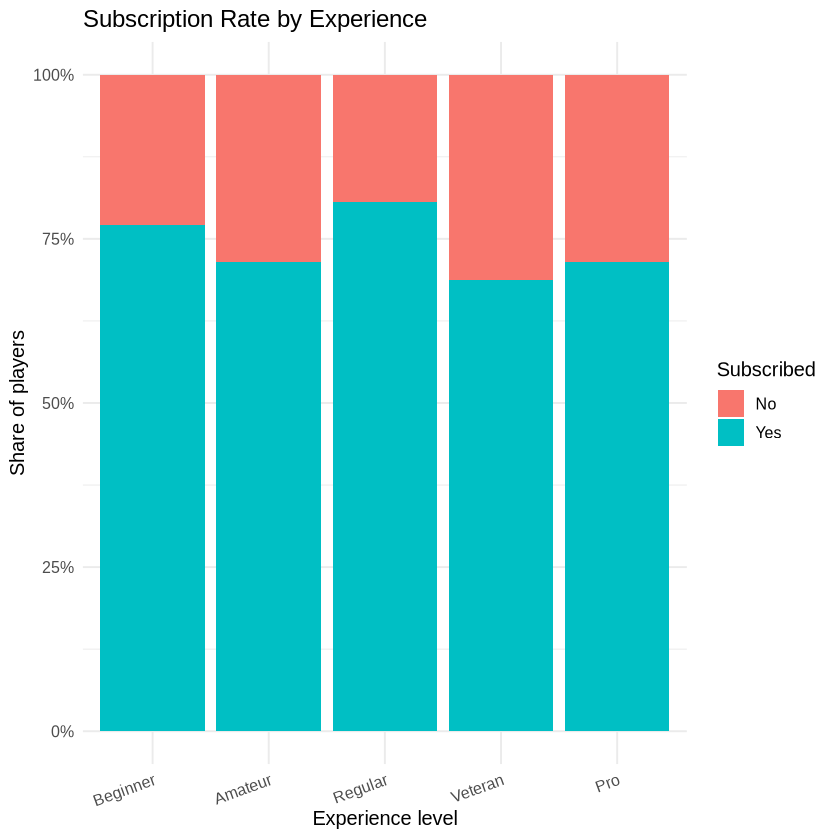

In [6]:
players_plot <- players |>

  mutate(
    subscribe_f = factor(subscribe, levels = c(FALSE, TRUE), labels = c("No", "Yes")),
    experience  = factor(experience, levels = c("Beginner","Amateur","Regular","Veteran","Pro"))
  )

ggplot(players_plot, aes(x = experience, fill = subscribe_f)) +
  geom_bar(position = "fill") +
  scale_y_continuous(labels = scales::percent) +
  labs(title = "Subscription Rate by Experience",
       x = "Experience level", y = "Share of players", fill = "Subscribed") +
  theme_minimal(base_size = 12) +
  theme(axis.text.x = element_text(angle = 20, hjust = 1))


Figure 1: This comparison shows the correlation between experience level and subscription status. Throughout all experience levels, there are more subscribers than non-subscribers. The "Regular" experience level has the lowest relative non-subscribers, and the highest relative subscribers. The "Veteran" experience level has the highest relative non-subscribers and the lowest relative subscribers. However, as experience level increases, subscription proportions do not consistently change. This lack of consistent correlation between experience level and subscription status, indicating other possible factors in subscription status.

### Subscription vs Played Hours

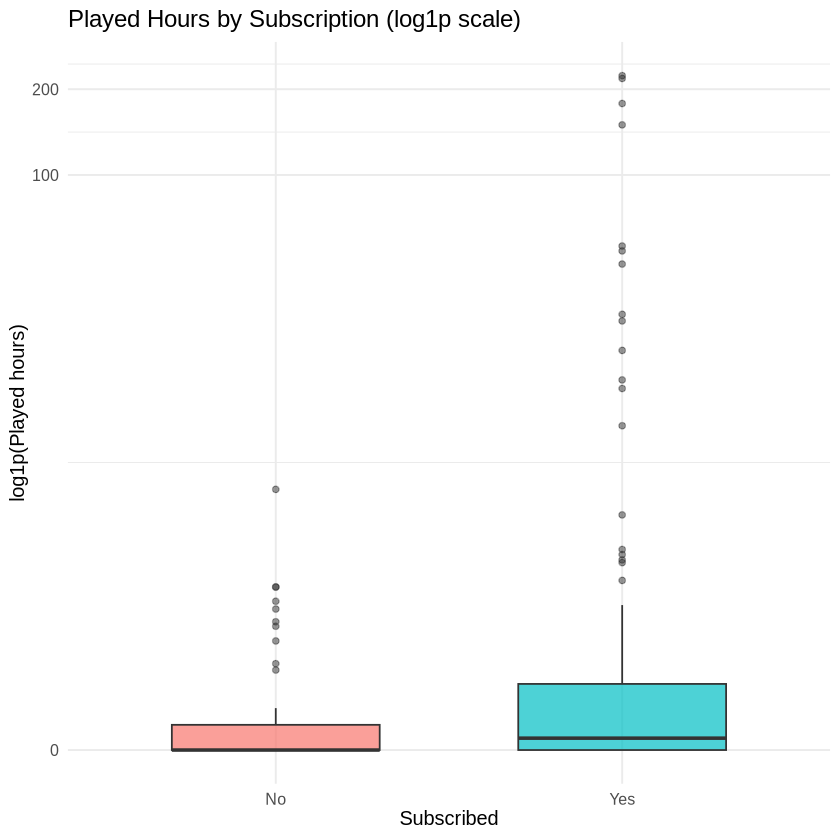

In [7]:
ggplot(players_plot, aes(x = subscribe_f, y = played_hours, fill = subscribe_f)) +
  geom_boxplot(alpha = 0.7, width = 0.6, outlier.alpha = 0.5) +
  scale_y_continuous(trans = "log1p") +
  labs(title = "Played Hours by Subscription (log1p scale)",
       x = "Subscribed", y = "log1p(Played hours)", fill = "Subscribed") +
  theme_minimal(base_size = 12) +
  theme(legend.position = "none")

Figure 2: In this graph, it is seen that there are more players in the lower range of total hours played. There is a higher amount of subscribers compared to non-subscribers within higher total hours played. This correlation indicates that total played hours has an indication on subscription status.

### Subscription vs Age

Warning message:
“Removed 2 rows containing non-finite outside the scale range
(`stat_ydensity()`).”
Warning message:
“Removed 2 rows containing non-finite outside the scale range
(`stat_boxplot()`).”


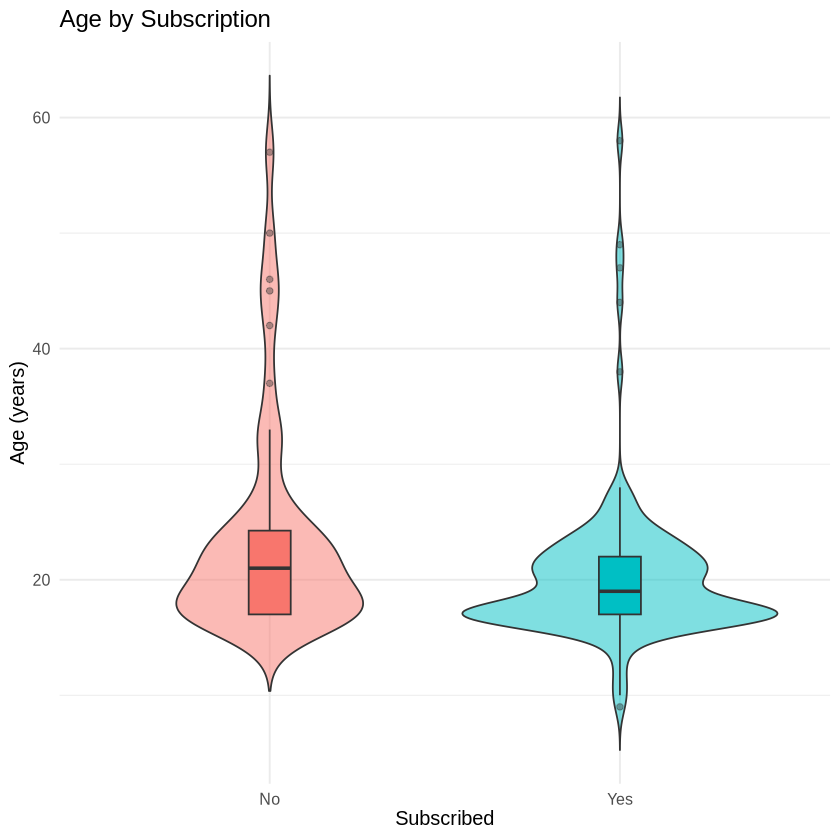

In [8]:
ggplot(players_plot, aes(x = subscribe_f, y = Age, fill = subscribe_f)) +
  geom_violin(trim = FALSE, alpha = 0.5) +
  geom_boxplot(width = 0.12, outlier.alpha = 0.4) +
  labs(title = "Age by Subscription",
       x = "Subscribed", y = "Age (years)", fill = "Subscribed") +
  theme_minimal(base_size = 12) +
  theme(legend.position = "none")


Figure 3: This figure shows the comparison between age and subscription status. Looking at the violin plot, there are more subcribers aged 15-20 than nonsubscribers within this age range. Before this age range, there is virtually no players. After this age range, nonsubscribers decrease gradually. However, subscribers after this age range decrease dramatically. Looking at the box plot, we can see that subscribers tend to be younger than nonsubscribers, as indicated by the median line. This indicates a correlation between age and subscription status -- more specifically, subscribers tend to be younger players between the age of 15-25 years. 

## Method and Plan

**Chosen Method: KNN Classification**

We will use K-Nearest Neighbors (KNN) to predict whether a player subscribes to the newsletter based on their **experience level**, **total played hours**, and **age**. KNN is a simple, interpretable classification method that predicts the class of a new observation by looking at the “closest” points in the feature space. It works well when we have a mix of numeric variables (played hours, age) and a categorical variable (experience level, e.g., Beginner/Amateur/Regular/Veteran/Pro), as long as we encode experience level appropriately.

### Why This Method?

KNN is suitable for this research question because:

* The outcome (newsletter subscription) is **binary** (subscribe vs not subscribe), which matches KNN classification.
* It can capture **non-linear relationships** between the predictors and the probability of subscribing.
* It is **distance-based**, which fits the idea that players with similar age, playtime, and experience level may behave similarly in terms of newsletter subscription.
* KNN does not require strong assumptions about the underlying data distribution.


**Assumptions**

* Players with **similar experience level, total played hours, and age** are likely to have similar newsletter subscription behavior.
* The feature space is not too sparse, and the number of predictors is small enough for distance-based methods to work well.
* The categorical predictor (experience level) can be encoded in a way that makes distance meaningful (e.g., ordinal or dummy variables).

**Limitations**

* **Sensitive to scaling and outliers**: large differences in played hours or age can dominate the distance calculation if not scaled.
* **Choice of K**: small K may overfit to noise; large K may oversmooth and underfit.
* KNN can be less efficient on larger datasets, since it requires computing distances to many points.


**Model Comparison**

We will use **cross-validation** on the training set to compare models with different values of **K** (e.g., K = 3, 5, 7, …).
We will evaluate performance using metrics such as **accuracy, precision, recall, and F1 score**. The optimal K will be chosen based on overall predictive performance.

**We Do Not Use Linear Regression**

* Our target variable (newsletter subscription) is **categorical**, not numeric, so linear regression is not appropriate.
* Binary regression methods (e.g., logistic regression) could be used in principle, but are beyond the methods formally covered in DSCI 100, so we focus on KNN classification.

**Data Processing**

* **Train–Test Split**: Split the data into **80% training** and **20% testing** before any modeling or cross-validation to avoid data leakage.
* **Encoding Experience Level**: Convert experience level (Beginner/Amateur/Regular/Veteran/Pro) into numeric/indicator variables so KNN can use it.
* **Scaling**: Standardize numeric predictors (**total played hours** and **age**) so that each contributes fairly to the distance calculation.
* **Cross-Validation**: Use **5-fold cross-validation** on the training data to tune K and select the best model.
* **Final Evaluation**: After choosing K, fit the final KNN model on the full training set and evaluate its performance on the **hold-out test set**.

After answering our research question, we will interpret the results (e.g., which combinations of age, hours, and experience tend to subscribe), discuss why the model performed as it did, and suggest next steps (such as trying other models or collecting more/different features).


# Methods & Results


### Modelling Overview

In this section, we build a predictive model to answer our research question:
**Can a player's experience level, total played hours, and age be used to predict whether they subscribe to the newsletter?**

We focus on a supervised classification approach, where the response variable is `subscribe` (subscriber vs. non-subscriber) and the predictors are `played_hours` and `Age`. Experience level was explored in the EDA but is not included in the final model because it is categorical and only weakly associated with subscription status in our preliminary analysis. Our goal is not only to fit a model, but also to evaluate how well it generalizes to unseen players using a train–test split and cross-validation.


In [9]:
library(tidyverse)
library(tidymodels) 
library(yardstick) 
set.seed(9999)
tail(players_clean,5)

Age,experience,played_hours,subscribe
<dbl>,<chr>,<dbl>,<lgl>
20,Amateur,0.0,TRUE
17,Amateur,0.0,TRUE
22,Veteran,0.3,FALSE
57,Amateur,0.0,FALSE
17,Amateur,2.3,FALSE


### Modelling Approach: KNN Classification

We use **K-Nearest Neighbors (KNN)** to predict whether a player subscribes to the newsletter based on their `played_hours` and `Age`. KNN is a simple, interpretable classification method that makes predictions by looking at the most similar players in the training data and taking a majority vote over their subscription status. This makes it suitable for our problem, where we expect players with similar playtime and age to have similar behavior.

KNN is a good fit here for several reasons:

- It can capture **non-linear relationships** between predictors and subscription status without explicitly specifying a functional form.
- It **does not require strong distributional assumptions** (e.g., normality) on the predictors.
- With only a small number of numeric predictors (`played_hours`, `Age`), the **curse of dimensionality is limited**, and distance-based similarity remains meaningful.

We make the following assumptions when applying KNN:

- Players with **similar total played hours and age** are likely to have **similar newsletter subscription behavior**.
- The feature space is not too sparse, so each test player will have a reasonable number of similar neighbours in the training set.
- After proper preprocessing (centering and scaling), Euclidean distance is an appropriate way to measure similarity.

KNN also has important limitations:

- It is **sensitive to scaling and outliers**: large differences in total played hours or age can dominate the distance calculation if predictors are not standardized.
- The choice of **K (number of neighbours)** controls model complexity; very small K can overfit to noise, while very large K can oversmooth and underfit.
- Prediction can be **computationally expensive** on very large datasets because distances must be computed to many training points.

To address these issues, we standardize predictors using a preprocessing recipe and tune K using cross-validation to balance bias and variance.


### Data Preparation for Modelling

To prepare the data for modelling, we construct a smaller data frame containing only the variables needed for prediction. We:

- Convert `subscribe` into a **factor**, because KNN is used in a classification setting.
- Retain only the numeric predictors `played_hours` and `Age`, which our EDA suggested are most closely related to subscription status.
- Exclude experience level from the final model to keep the feature space low-dimensional and because its relationship with subscription appeared weak and non-monotonic.

The resulting `players_model` data set will be used for splitting into training and test sets and for all downstream modelling steps.


In [10]:
players_model <- players_clean |>
  transmute(
    subscribe   = as.factor(subscribe),
    #experience  = factor(experience, levels = c("Beginner","Amateur","Regular","Veteran","Pro")),
    played_hours = played_hours,
    Age          = Age,
  )

### Train–Test Split

We split the data into a **training set** (used for model fitting and tuning) and a **test set** (used only for final performance evaluation). Using a separate test set allows us to estimate how well the model generalizes to new players, rather than just memorizing the training data.

We use a stratified split on `subscribe` to preserve the proportion of subscribers and non-subscribers in both sets, which helps avoid biased performance estimates if one class is less frequent.



In [11]:
split <- initial_split(players_model, prop = 0.8, strata = subscribe)
train <- training(split)
test  <- testing(split)

set.seed(9999)
slice_sample(train, n = 5)

subscribe,played_hours,Age
<fct>,<dbl>,<dbl>
TRUE,0.0,17
FALSE,0.1,18
FALSE,2.3,17
TRUE,0.0,18
TRUE,0.0,20


### Preprocessing, Cross-Validation, and Hyperparameter Tuning

Because KNN is distance-based, we first **standardize the predictors** using a recipe with centering and scaling steps. This ensures that `played_hours` and `Age` are on a comparable scale, so one variable does not dominate the distance calculation simply due to its units.

We then define a KNN model where the number of neighbours `K` is treated as a **tuning parameter**. To choose a good value of K, we perform **5-fold cross-validation** on the training set: the training data are split into 5 folds, we repeatedly train on 4 folds and validate on the remaining fold, and we average performance across all folds.

We evaluate K values on a grid (e.g., from 1 to 30) and select the K that achieves the **highest cross-validated accuracy**. This procedure helps balance underfitting and overfitting and gives us a data-driven choice of model complexity.


In [12]:
players_recipe <- recipe(subscribe ~ played_hours + Age, data = train) |>
  step_scale(all_predictors()) |>
  step_center(all_predictors())

### kNN model specification
We declare a k-Nearest Neighbors classifier with uniform (rectangular) weights and leave neighbors to be tuned, setting the engine to kknn and mode to classification so it can slot into a workflow.

In [13]:
players_spec <- nearest_neighbor(weight_func = "rectangular",
                             neighbors = tune()) |>
  set_engine("kknn") |>
  set_mode("classification")

### 5-fold cross-validation
We build stratified 5-fold CV splits on the training set to estimate performance across multiple resamples, reducing variance in the validation metrics and avoiding any look-ahead to the test set.

In [14]:
players_vfold <- vfold_cv(train, v = 5, strata = subscribe)

In [15]:
nrow(players_model)

[1] 194

### Tuning grid & evaluation
We combine the recipe and model in a workflow, tune over k = 1…30 using the CV folds, collect metrics, and filter to accuracy; this yields a table of mean CV accuracy for each k to guide selection.

In [16]:
k_vals <- tibble(neighbors = seq(from = 1, to = 30, by = 1))

In [17]:
knn_results <- workflow() |>
  add_recipe(players_recipe) |>
  add_model(players_spec) |>
  tune_grid(resamples = players_vfold, grid = k_vals) |>
  collect_metrics()
accuracies <- knn_results |>
  filter(.metric == "accuracy")
accuracies

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,binary,0.5195833,5,0.027251386,Preprocessor1_Model01
2,accuracy,binary,0.5195833,5,0.027251386,Preprocessor1_Model02
3,accuracy,binary,0.6172581,5,0.019392958,Preprocessor1_Model03
4,accuracy,binary,0.5787231,5,0.018183298,Preprocessor1_Model04
5,accuracy,binary,0.6239247,5,0.028539476,Preprocessor1_Model05
6,accuracy,binary,0.6303763,5,0.026767769,Preprocessor1_Model06
7,accuracy,binary,0.6228763,5,0.018291840,Preprocessor1_Model07
8,accuracy,binary,0.6164247,5,0.020208565,Preprocessor1_Model08
9,accuracy,binary,0.6430780,5,0.026530586,Preprocessor1_Model09


### Accuracy vs. k plot
We plot CV accuracy against k to visualize the bias–variance trade-off; accuracy rises from very small k and then plateaus in the mid-to-high teens, indicating where performance stabilizes.

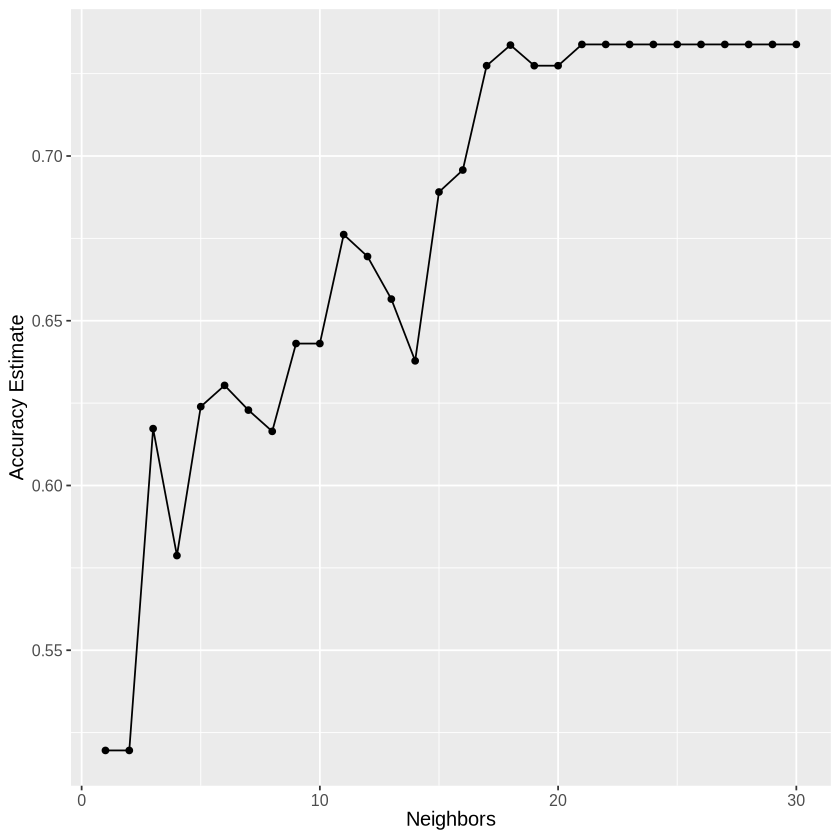

In [18]:
accuracies_vs_k <- ggplot(accuracies, aes(x = neighbors, y = mean)) +
  geom_point() +
  geom_line() +
  labs(x = "Neighbors", y = "Accuracy Estimate") +
  theme(text = element_text(size = 12))
accuracies_vs_k 

### Select best k
We sort the CV results by mean accuracy and pick the top value, which lands at k = 21 here—consistent with the plateau in the plot and giving a defensible complexity choice.

In [24]:
best_k <- accuracies |>
  arrange(desc(mean)) |>
  head(1) |>
  pull(neighbors)

best_k

[1] 21

From the cross-validation results, the best-performing model uses approximately **K = 21 neighbours**, which we carry forward as our final KNN specification.


### Final Model and Test-Set Performance

Using the best K found via cross-validation, we finalize the KNN workflow and **refit the model** on the full training set. We then evaluate this final model on the held-out test set, which was not used at any stage of tuning.

We summarize performance using **accuracy**, the proportion of correctly classified players. This metric is appropriate here because our classes (subscribed vs. not subscribed) are reasonably balanced, and we are primarily interested in overall predictive performance rather than prioritizing one class over the other.


In [20]:
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = best_k) |>
  set_engine("kknn") |>
  set_mode("classification")

knn_fit <- workflow() |>
  add_recipe(players_recipe) |>
  add_model(knn_spec) |>
  fit(data = train)
knn_fit

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

• step_scale()
• step_center()

── Model ───────────────────────────────────────────────────────────────────────

Call:
kknn::train.kknn(formula = ..y ~ ., data = data, ks = min_rows(21,     data, 5), kernel = ~"rectangular")

Type of response variable: nominal
Minimal misclassification: 0.2662338
Best kernel: rectangular
Best k: 21

### Test predictions, accuracy & class imbalance

We predict labels for the held-out test set and compute accuracy by comparing `.pred_class` to the true `subscribe`; the result (≈ 0.725) suggests that the tuned kNN model performs reasonably well overall on unseen players. However, `subscribe = TRUE` is much more common than `subscribe = FALSE` in this dataset, so a model can achieve a relatively high accuracy simply by predicting the majority class most of the time.

To diagnose this, we compute a confusion matrix for the test set (Figure X). The confusion matrix shows that the model correctly identifies many of the TRUE cases but rarely predicts FALSE when the true label is FALSE, meaning it has poor recall for the minority (non-subscriber) class. In other words, the classifier tends to over-predict subscriptions, which is problematic if our goal is specifically to flag players who do **not** subscribe.


In [21]:
predictions <- predict(knn_fit, test) |> 
  bind_cols(test)

predictions

metrics <- predictions |> 
  metrics(truth = subscribe, estimate = .pred_class) |> 
  filter(.metric == "accuracy")

metrics

.pred_class,subscribe,played_hours,Age
<fct>,<fct>,<dbl>,<dbl>
TRUE,TRUE,0.1,21
TRUE,TRUE,0.0,17
TRUE,TRUE,0.0,19
TRUE,TRUE,0.0,17
TRUE,TRUE,0.0,17
TRUE,TRUE,0.7,21
TRUE,TRUE,1.8,23
TRUE,TRUE,0.1,21
TRUE,TRUE,0.0,17


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.725


On the test set, the final KNN model achieves an accuracy of approximately **72.5%**, meaning it correctly predicts newsletter subscription status for about three quarters of players it has not seen before. However, the confusion matrix reveals that the model tends to predict most players as **subscribers**, which inflates the overall accuracy because the “TRUE” (subscriber) class is more common in our data. As a result, performance on the “FALSE” (non-subscriber) class is noticeably weaker: many non-subscribing players are incorrectly classified as subscribers.


In [22]:
conf_mat_tbl <- predictions |>
  conf_mat(truth = subscribe, estimate = .pred_class)

conf_mat_tbl


          Truth
Prediction FALSE TRUE
     FALSE     0    0
     TRUE     11   29

In [26]:
cm <- as.matrix(conf_mat_tbl$table)

TP_TRUE <- cm["TRUE",  "TRUE"]  # 29
FP_TRUE <- cm["TRUE",  "FALSE"] # 11
FN_TRUE <- cm["FALSE", "TRUE"]  # 0
TN_TRUE <- cm["FALSE", "FALSE"] # 0

# Metrics for TRUE (subscriber) class
precision_TRUE <- TP_TRUE / (TP_TRUE + FP_TRUE)
recall_TRUE    <- TP_TRUE / (TP_TRUE + FN_TRUE)
F1_TRUE        <- 2 * precision_TRUE * recall_TRUE / (precision_TRUE + recall_TRUE)

# Metrics for FALSE (non-subscriber) class
TP_FALSE <- TN_TRUE
FP_FALSE <- FN_TRUE
FN_FALSE <- FP_TRUE

# here TP_FALSE + FP_FALSE = 0, so precision is undefined (no predicted FALSE)
precision_FALSE <- ifelse(TP_FALSE + FP_FALSE == 0, NA_real_,
                          TP_FALSE / (TP_FALSE + FP_FALSE))
recall_FALSE    <- TP_FALSE / (TP_FALSE + FN_FALSE)
F1_FALSE        <- ifelse(is.na(precision_FALSE), NA_real_,
                          2 * precision_FALSE * recall_FALSE /
                          (precision_FALSE + recall_FALSE))

precision_TRUE; recall_TRUE; F1_TRUE
precision_FALSE; recall_FALSE; F1_FALSE


[1] 0.725

[1] 1

[1] 0.8405797

[1] NA

[1] 0

[1] NA

*Interpretation:* The model **never correctly flags a non-subscriber**, so its recall for the FALSE class is 0, and the F1 score for this class is effectively 0 as well.

These results confirm that our KNN model strongly favors the TRUE (subscriber) class: it has perfect recall and reasonably high precision for subscribers, but it completely fails to identify non-subscribers. The overall accuracy of 72.5% therefore hides very poor performance on the minority FALSE class, illustrating why accuracy alone is misleading under class imbalance.

To address this imbalance issue, we would not rely on accuracy alone. Instead, we could report metrics that are more sensitive to the minority class, such as recall/sensitivity for `subscribe = FALSE`, specificity for `subscribe = TRUE`, or balanced accuracy. On the modelling side, we could try rebalancing strategies (e.g., up-sampling the FALSE class or down-sampling the TRUE class in the training data) or adjusting the decision threshold used to convert predicted probabilities to class labels. Although we do not fully implement these extensions in this project, the confusion matrix highlights that any practical deployment of this model should explicitly account for the class imbalance rather than relying solely on overall accuracy.


### Class Imbalance and Limitations of Accuracy

The confusion matrix shows that the model predicts the **subscriber (TRUE)** class much more frequently than the **non-subscriber (FALSE)** class. Because subscribers make up a larger proportion of the dataset, a model that simply guesses “TRUE” most of the time can still achieve a relatively high overall accuracy. This means that **accuracy alone is a misleading measure of performance** in our setting.

To understand model quality more fully, we would also want to examine **class-specific metrics**, such as:

- **Sensitivity/recall for the FALSE class** (how often non-subscribers are correctly identified),
- **Specificity for the TRUE class**,
- **Balanced accuracy**, which averages performance across both classes,
- Or **F1 scores** for each class.

These metrics would likely show that our model is **much better at identifying subscribers than non-subscribers**. In practical terms, this is a limitation if the goal is to reliably detect players who are *not* subscribing (e.g., to target them with interventions).

In future work, we could address this imbalance in several ways:

- **Resampling the training data**, for example, by upsampling the minority class (FALSE) or downsampling the majority class (TRUE),
- Using algorithms or tuning procedures that **optimize a balanced metric** (such as balanced accuracy or F1, instead of plain accuracy),
- Incorporating additional predictors that may better separate subscribers from non-subscribers.

In this project, we keep the original KNN model and report its limitations, but we note that rebalancing the data and optimizing more appropriate metrics would likely improve performance on the non-subscriber class.


Warning message:
“Removed 1 row containing missing values or values outside the scale range
(`geom_point()`).”


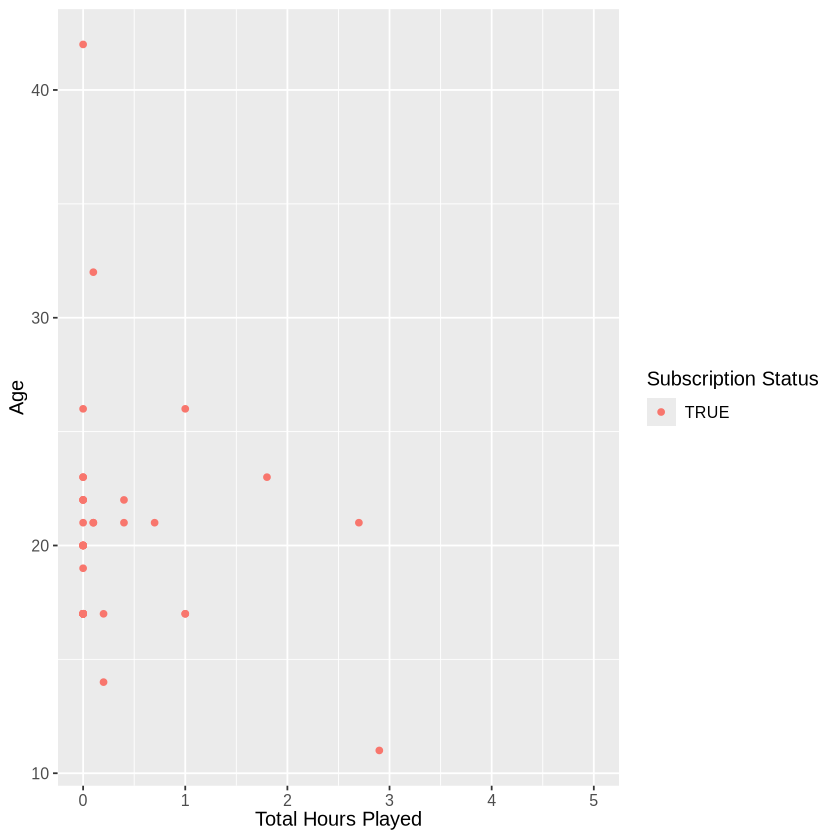

In [27]:
wkflw_plot <-
  ggplot(predictions, aes(x = played_hours, y = Age, color = .pred_class), alpha = 0.75) +
  geom_point() +
xlim(0, 5) +
  labs(color = "Subscription Status",
       x = "Total Hours Played",
       y = "Age") +
  theme(text = element_text(size = 12))

wkflw_plot

**Figure 4.** Predicted subscription status on the test set as a function of total hours played and age. Each point represents a player, with colour indicating whether they actually subscribed. This visualization shows where the KNN model tends to make correct vs. incorrect predictions and how its decisions depend on the two main predictors.


# Discussion

### what we found?
Our analysis found that there are differences between subscribers and non-subscribers in terms of age and game duration, but these variables alone cannot predict the subscription status well. The adjusted KNN model has achieved moderate accuracy and performed significantly better than non-subscribers in identifying subscribers. This model reflects the significant category imbalance in the data set, which affects the ability of the model to detect non-subscribed players.

### Whether these findings were expected 
These results are in line with our expectations to some extent. Players who subscribe to the service tend to have higher participation, which is reflected in their longer game time. However, we originally expected that the age and game duration would provide stronger prediction ability than the actual situation, but this is not the case.The degree of gap between different groups and the degree of limitation of this gap on the performance of the model are much more serious than we expected.

### Potential impact of findings
The research results show that relying solely on basic demographic and playtime variables is insufficient for accurately identifying non-subscribers. For stakeholders such as game developers or marketing teams, this means that more detailed behavior AI data may be necessary to design effective strategies for retaining or converting players. The imbalance issue also highlights the risk of overestimating a model's performance when it performs well only for the majority class.

### Potential future questions
These results raise several problems in future research. In addition to behavioural or in-game activity variables: 
- what other variables can effectively improve the prediction performance?
- How will the model perform under different rebalancing techniques (such as oversampling or generating synthetic data)?
- Can other modelling methods(such as logical regression, random forest or gradient enhancement) deal with category imbalance more effectively?

Exploring these problems may give us a deeper understanding of the factors that affect subscription decisions.